# *Cálculo Beta en Empresas Cotizadas*

*En anteriores apartados, hemos hecho referencia al cálculo de la Beta de una compañía que cotiza en bolsa. Vamos a ver un ejemplo de como calcularlo en Python, y además los pasos en Excel para ver la diferncia entre ambos.*

*También en este apartado vamos a ver cómo descargar datos desde una web, lo que en muchas ocasiones nos será de mucha utilidad*

In [117]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [118]:
plt.close("all")

*Importamos esta librería que nos permite leer datos del la página yahoo finance, donde están los principales índices búrsatiles y podemos descargar los datos historicos*

In [119]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [120]:
import yfinance as yf

*En este apartado instalamos la librería **yfinance** que nos permite descargar datos desde la página Yahoo Finance de forma rápida y sencilla*

*Para descargar el histórico de cotizaciones de una empresa utilizamos esta función, indicando en primer lugar el código de la empresa (a continuación indicamos alguns de los códigos de las empresas cotizadas en el Ibex35, pero podemos buscarlo en la propia página de yahoo), y después indicamos el histórico que queremos descargar, o bien indicamos una fecha de inicio o fin, existen ambas posibilidades.*

**Símbolo	Nombre de la empresa**

**NTGY.MC**	Naturgy Energy Group, S.A.

**CABK.MC**	CaixaBank, S.A.

**ACS.MC**	ACS, Actividades de Construcción y Servicios, S.A.

**ENG.MC**	Enagás, S.A.

**BKT.MC**	Bankinter, S.A.

**AENA.MC**	Aena S.M.E., S.A.

**ELE.MC**	Endesa, Sociedad Anonima

**SGRE.MC**	Siemens Gamesa Renewable Energy, S.A.

**TEF.MC**	Telefónica, S.A.

**REP.MC**	Repsol, S.A.

**IBE.MC**	Iberdrola, S.A.

**SAN.MC**	Banco Santander, S.A.

**MAP.MC**	Mapfre, S.A.

*En el caso de Excel hay algunos tutoriales acerca de diversas opciones para importar datos desde web, sin embargo en este caso se pueden copiar los datos y directamente pegarlos, Excel va a reconocer cada importe en cada celda realizando una tabla*

In [121]:
data = yf.download("CABK.MC", period = '5y')
data = pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed


*Aquí podemos ver el precio de cotización de apertura, el más alto del día, el más bajo y el precio de cierre, además del precio de cierro ajustado y el volumen de operaciones. Hemos seleccionado Caixabank pero podemos elegir el valor que queramos dentro del Ibex indicando los códigos*

*La columna que nos interesa será los precios de cierre, por ello mediante la librería pandas vamos a eliminar el resto de columnas. Este paso se puede realizar de múltiples maneras, en nuestro caso hemos selecionado esta, pero cualquier otra fórmula dentro de pandas que nos deje tan solo la columna "Close" es válida*

In [122]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-04-08,2.420,2.519,2.420,2.485,2.049515,11485795
2016-04-11,2.493,2.570,2.452,2.527,2.084155,10264436
2016-04-12,2.534,2.585,2.455,2.507,2.067660,13235888
2016-04-13,2.553,2.663,2.539,2.641,2.178177,16004846
2016-04-14,2.655,2.688,2.595,2.674,2.205395,15485681
...,...,...,...,...,...,...
2021-03-31,2.685,2.700,2.639,2.639,2.639000,90831719
2021-04-01,2.600,2.602,2.562,2.600,2.600000,36653487
2021-04-06,2.607,2.639,2.581,2.598,2.598000,14825783


In [123]:
data = data.loc[:,["Close"]]

*Vamos a añadir una columna que nos calcula el logaritmo de todos los retornos, lo que implica la rentabilidad del valor. Para ello necesitamos la librería numpy, y selecionamos la fila anterior mediante el código "shift(1)" de pandas*

In [124]:
data["Rentabilidad Valor"] = np.log( data / data.shift(1))

In [125]:
data

,Close,Rentabilidad Valor
Date,,
2016-04-08,2.485,NaN
2016-04-11,2.527,0.016760
2016-04-12,2.507,-0.007946
2016-04-13,2.641,0.052071
2016-04-14,2.674,0.012418
...,...,...
2021-03-31,2.639,-0.017653
2021-04-01,2.600,-0.014889
2021-04-06,2.598,-0.000769


*En Excel tendremos que usar la fórmula **=LN((valor día/valor día anterior))**.*

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD34611040>],
      dtype=object)

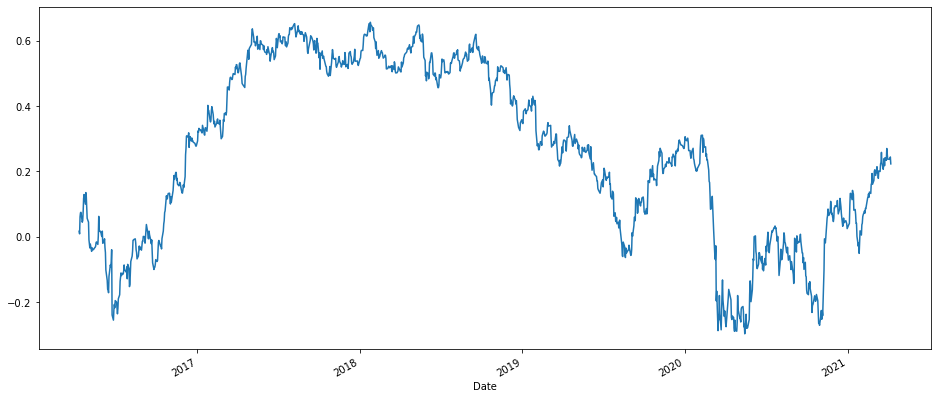

In [95]:
data['Rentabilidad Valor'].cumsum().plot(subplots=True,figsize=(16,7)) 

*Mediante este gráfico podemos ver la evolución de CaixaBank en los últimos 5 años*

*Ahora, vamos a hacer lo mismo pero con el índice de referencia, en este caso **IBEX35**. Hay que tener en cuenta que podemos hacerlo con cualquiera de los índices que están publicados*

In [126]:
mercado = yf.download("^IBEX", period = '5y')
mercado = pd.DataFrame(mercado)

[*********************100%***********************]  1 of 1 completed


In [127]:
mercado

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-04-08,8309.900391,8462.799805,8309.900391,8427.599609,8427.590820,297771900
2016-04-11,8413.400391,8563.400391,8344.400391,8497.599609,8497.590820,270182600
2016-04-12,8519.799805,8587.900391,8425.599609,8546.299805,8546.291016,326591700
2016-04-13,8660.099609,8820.700195,8596.099609,8820.700195,8820.691406,415148700
2016-04-14,8854.000000,8870.900391,8743.500000,8861.500000,8861.491211,343392500
...,...,...,...,...,...,...
2021-03-31,8594.700195,8652.200195,8568.000000,8580.000000,8580.000000,265542300
2021-04-01,8595.599609,8610.099609,8542.700195,8577.599609,8577.599609,150979000
2021-04-06,8673.200195,8691.900391,8615.500000,8634.599609,8634.599609,201717300


In [128]:
mercado = mercado.loc[:,["Close"]]

In [129]:
mercado

,Close
Date,
2016-04-08,8427.599609
2016-04-11,8497.599609
2016-04-12,8546.299805
2016-04-13,8820.700195
2016-04-14,8861.500000
...,...
2021-03-31,8580.000000
2021-04-01,8577.599609
2021-04-06,8634.599609


In [130]:
mercado["Rentabilidad"] = np.log( mercado / mercado.shift(1))

In [131]:
mercado

,Close,Rentabilidad
Date,,
2016-04-08,8427.599609,NaN
2016-04-11,8497.599609,0.008272
2016-04-12,8546.299805,0.005715
2016-04-13,8820.700195,0.031603
2016-04-14,8861.500000,0.004615
...,...,...
2021-03-31,8580.000000,-0.001770
2021-04-01,8577.599609,-0.000280
2021-04-06,8634.599609,0.006623


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD37119BE0>],
      dtype=object)

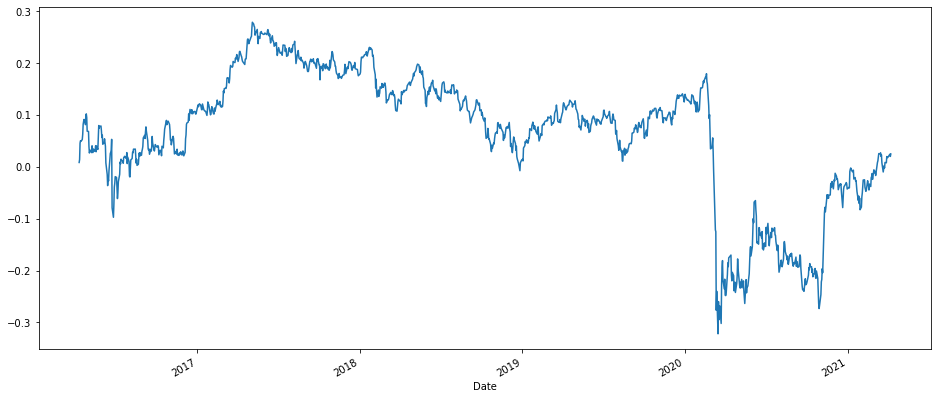

In [132]:
mercado['Rentabilidad'].cumsum().plot(subplots=True,figsize=(16,7)) 

*En este gráfico vemos la evolución del Ibex35 en los últimos 5 años. Hasta aquí hemos realizado exactamente los mismos pasos para descargar el valor y el índice.*

*Ahora vamos a hacer un único DataFrame para tener los datos en un mismo archivo*

In [133]:
data["Close Mercado"] = mercado['Close']
data["Rentabilidad Mercado"] = mercado['Rentabilidad']

In [134]:
data

,Close,Rentabilidad Valor,Close Mercado,Rentabilidad Mercado
Date,,,,
2016-04-08,2.485,NaN,8427.599609,NaN
2016-04-11,2.527,0.016760,8497.599609,0.008272
2016-04-12,2.507,-0.007946,8546.299805,0.005715
2016-04-13,2.641,0.052071,8820.700195,0.031603
2016-04-14,2.674,0.012418,8861.500000,0.004615
...,...,...,...,...
2021-03-31,2.639,-0.017653,8580.000000,-0.001770
2021-04-01,2.600,-0.014889,8577.599609,-0.000280
2021-04-06,2.598,-0.000769,8634.599609,0.006623


*Podemos exportar este fichero a Excel, en este caso lo hemos realizado para cotejar los resultados y verificar que los cálculos son correctos, pero no es necesario. También podemos descargar varios valores, unirlos en un DataFrame y exportar a Excel para realizar cálculos u visualizaciones*

In [135]:
data.to_excel("Data.xlsx", sheet_name="Sheet1")

*Recordemos cómo se calcula la Beta de una compañía*

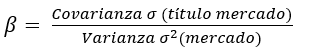

*Ahora directamente vamos a aplicar la fórmula. Igualmente hay varios métodos para este cálculo, se puede hacer por partes, para que vayamos viendo cada uno de los pasos, o bien se puede aplicar de una sola vez.*

*En este caso, el primer paso es calcular la covarianza del título de mercado, que en nuestro caso es Caixabank. Mediante "data.cov()" calculamos la covarianza de todo el fichero, pero a nostros la que nos interesa es la del título, por ello seleccionamos la fila 1, la columna 3*

In [107]:
cov = data.cov()

In [108]:
cov

,Adj Close,Rentabilidad Valor,Adj Close Mercado,Rentabilidad Mercado
Adj Close,0.489685,0.000535,6.365632e+02,0.000155
Rentabilidad Valor,0.000535,0.000528,1.095005e+00,0.000230
Adj Close Mercado,636.563177,1.095005,1.142253e+06,0.681710
Rentabilidad Mercado,0.000155,0.000230,6.817104e-01,0.000173


In [109]:
cov_CABK = cov.iloc[1,3]  #usamos la covarianza que corresponde a la línea 1, columna 3 (teniendo en cuenta que hay 0,1,2,3)

In [110]:
cov_CABK

0.00023026011729350714

*Calculemos ahora la varianza del mercado*

In [136]:
IBEX_var = data['Rentabilidad Mercado'].var()
IBEX_var

0.000173058446715128

*Finalmente calculamos la Beta de la compañía*

In [137]:

CABK_beta= cov_CABK / IBEX_var # division entre la covarianza contra mercado dividido entre la varianza del mercado
CABK_beta

1.3305338263698794

*En Excel usaremos la fórmula **COVAR(matriz rentabilidad valor; matriz rentabilidad mercado)**, por otro lado **=VAR(matriz rentabilidad mercado)**, para después dividir ambos valores.*

# Me da una pequeña diferencia entre el cálculo en Excel y el Cálculo en Python, no se el motivo#

**Interpretación:** *La Beta es una variable que mide la diferencia de rentabilidad de una acción respecto a su índice de referencia.
Por ejemplo, si Acerinox tiene una Beta de 1,1 respecto al Ibex 35 quiere decir que Acerinox se moverá un 10% más de lo que lo haga el Ibex 35. Si el Ibex 35 sube un 10% Acerinox subirá un 11%, y si el Ibex 35 baja un 10% Acerinox bajará un 11%.
De forma similar si Abertis tiene una Beta de 0,80 en caso de que el Ibex 35 suba un 10% Abertis subirá un 8%, mientras que si el Ibex 35 cae un 10% Abertis bajará un 8%.
Un valor con una Beta de 1 se movería exactamente igual que el mercado.
Algunos valores pueden tener Beta negativa. Eso quiere decir que cuando el mercado cae esos valores suben y cuando el mercado sube esos valores bajan. Son casos raros pero existen.
De igual forma la Beta de una compañía cambia en función del tiempo que analicemos*

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD36EC3AC0>],
      dtype=object)

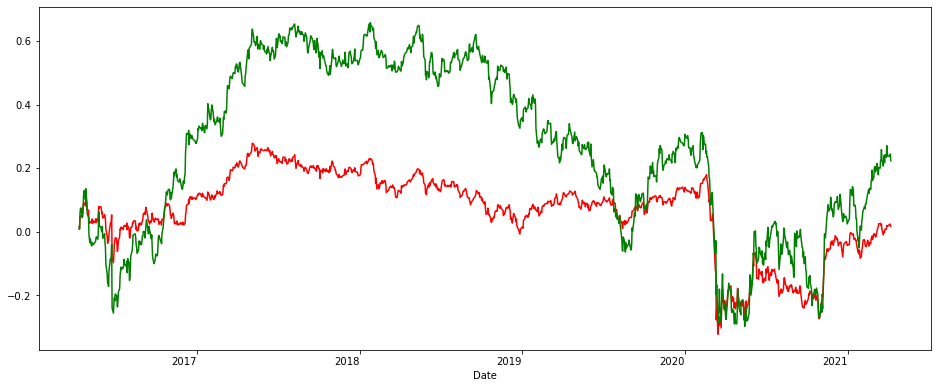

In [114]:
mercado['Rentabilidad'].cumsum().plot(subplots=True,figsize=(16,7), color = 'red')
data['Rentabilidad Valor'].cumsum().plot(subplots=True,figsize=(16,7), color = 'green') 

*En este gráfico podemos comprobar la evolución de la rentabilidad de Caixabank respecto al IBEX35, en rojo vemos la volatilidad del índice, mientras que en verde vemos la de nuestro valor. Si analizamos el periodo anterior al 2017 nuestra Beta será menor que si analizamos el periodo comprendido entre 2017 y 2020, en cualquier caso la mayor parte de la veces nuestra Beta es mayor a 1, porque sigue los movimientos del Ibex35, superándolos, si el índice baja, nuestro valor baja más, y si el índice sube, nuestro valor lo hace más también.*

*Estre gráfico nos permite ver ciertas anomalías que pueden afectar a índice bursátil, como en este caso el Covid19, donde podemos ver claramente que índice y valor se fusionan prácticamente.*